In [6]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df =pd.read_csv('beacons.csv')
df.shape

(1916, 10)

In [8]:
X =  df.iloc[:1700,3:]
y =   df.iloc[:1700,1:3]
X1 =  df.iloc[1700:,3:]
y1 =   df.iloc[1700:,1:3]

In [9]:
y['x']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1695    5.4
1696    5.4
1697    5.4
1698    5.4
1699    5.4
Name: x, Length: 1700, dtype: float64

In [10]:
ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)
    
ada_reg.fit(X, y['x'])



AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

In [11]:
ada_reg1 = AdaBoostRegressor(n_estimators=100)
print(ada_reg)
    
ada_reg1.fit(X, y['y'])


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

In [12]:
predictions = ada_reg.predict(X1)
prediction= ada_reg1.predict(X1)

predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'a'})
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns={0:'b'})

y1 =y1.reset_index()
y1['a'] = predictions['a']
y1['b'] = prediction['b']

y1['distance']=np.sqrt((y1['x']-y1['a'])**2+(y1['y']-y1['b'])**2)
y1['distance'].mean()


3.811125649755214

In [13]:
from sklearn import metrics

maex = metrics.mean_absolute_error(y1['x'],y1['a'])
maey= metrics.mean_absolute_error(y1['y'],y1['b'])
maeauto = (maex + maey)/2

In [14]:
msex = metrics.mean_squared_error(y1['x'],y1['a'])
msey= metrics.mean_squared_error(y1['y'],y1['b'])
msemain = (msex + msey)/2

In [15]:
rmsex = np.sqrt(metrics.mean_squared_error(y1['x'],y1['a']))
rmsey= np.sqrt(metrics.mean_squared_error(y1['y'],y1['b']))
rmsemain = (rmsex + rmsey)/2

In [16]:
print("Mean absolute error : ", maeauto.mean())
print("Mean squared error : ", msemain.mean())
print("Root Mean squared error : ", rmsemain.mean())

Mean absolute error :  2.4984747142945003
Mean squared error :  8.858251512650575
Root Mean squared error :  2.971867596429616


In [65]:
#boxplot
new =  pd.DataFrame()
new['Rmse'] =[2.92,3.68,3.70]
new['Mae'] =[2.42,2.81,2.73]
new['name'] = ['Ada','xg','Gradient']
new

,Rmse,Mae,name
0,2.92,2.42,Ada
1,3.68,2.81,xg
2,3.70,2.73,Gradient


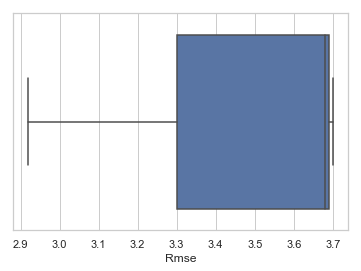

In [66]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x=new["Rmse"])

In [ ]:
a = pd.DataFrame(ada_reg1.predict(X1))
b = pd.DataFrame(ada_reg.predict(X1))
b = b.rename(columns={0:'bc1'})
c = pd.concat([a,b],axis=1)
c = c.rename(columns={0:'bc2'})
preds = c.values


Y_test = y1[['a','b']]
Y_test = Y_test.values

In [58]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    return np.mean(dists), dists

#preds = ada_reg1.predict(X1)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

2.425648934607929


In [57]:
Y_test

array([[ 2.99010753,  7.5124424 ],
       [ 3.11077586,  7.5124424 ],
       [ 3.11077586,  9.40629921],
       [ 3.41264108,  9.0087146 ],
       [ 3.11077586,  7.5124424 ],
       [ 3.1253112 ,  9.0087146 ],
       [ 3.1253112 ,  9.01818182],
       [ 3.1253112 ,  9.0087146 ],
       [ 2.3503268 ,  9.21489362],
       [ 2.5       ,  9.21489362],
       [ 3.11077586,  7.27016667],
       [ 3.1253112 ,  9.0087146 ],
       [ 3.1253112 ,  9.21489362],
       [ 2.5       ,  9.21489362],
       [ 3.1253112 ,  9.21489362],
       [ 3.0888    ,  9.21489362],
       [ 3.1253112 ,  9.21489362],
       [ 3.41264108,  4.63968254],
       [ 3.53296943,  6.5625    ],
       [ 2.99010753,  6.35896825],
       [ 3.11077586,  7.5124424 ],
       [ 3.11077586,  9.0087146 ],
       [ 3.41264108,  7.5124424 ],
       [ 3.41264108,  9.01818182],
       [ 3.1253112 ,  7.5124424 ],
       [ 3.11077586,  7.27016667],
       [ 3.1253112 ,  9.21489362],
       [ 3.41264108,  9.0087146 ],
       [ 3.1253112 ,

In [ ]:
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

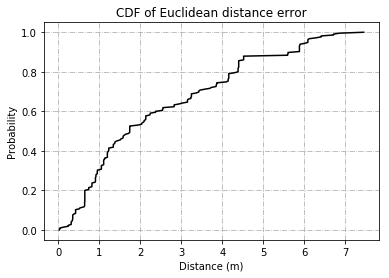

In [59]:
import numpy as np 
sortedl2_deep = np.sort(l2dists)
prob_deep = 1. * np.arange(len(sortedl2_deep))/(len(sortedl2_deep) - 1)
fig, ax = plt.subplots()
lg1, = ax.plot(sortedl2_deep, prob_deep, color='black')
plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

plt.savefig('Figure_CDF_error.png', dpi=300)
plt.show()
plt.close()